In [1]:
import os
os.chdir('D:\\DeepLearning\\cytodata-hackathon-base') # this needs to be at the root of repo
os.environ["FSSPEC_CONFIG_DIR"] = "D:\DeepLearning\cytodata-hackathon-base\youyi"

In [2]:
import logging
logging.getLogger("bfio").setLevel(logging.ERROR)
logging.getLogger("bfio.backends").setLevel(logging.ERROR)
logging.getLogger("aicsimageio").setLevel(logging.ERROR)

from upath import UPath as Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbvv
import os
import warnings
from aicsimageio import transforms, AICSImage
from aicsimageprocessing import diagnostic_sheet, read_ome_zarr, rescale_image, imgtoprojection

from serotiny.io.image import image_loader
from cytodata_aics.io_utils import rescale_image

In [3]:
df = pd.read_parquet("s3://allencell-hipsc-cytodata/hackathon_manifest_17oct2022.parquet")
print(f'Number of cells: {len(df)}')
print(f'Number of columns: {len(df.columns)}')

Number of cells: 214037
Number of columns: 77


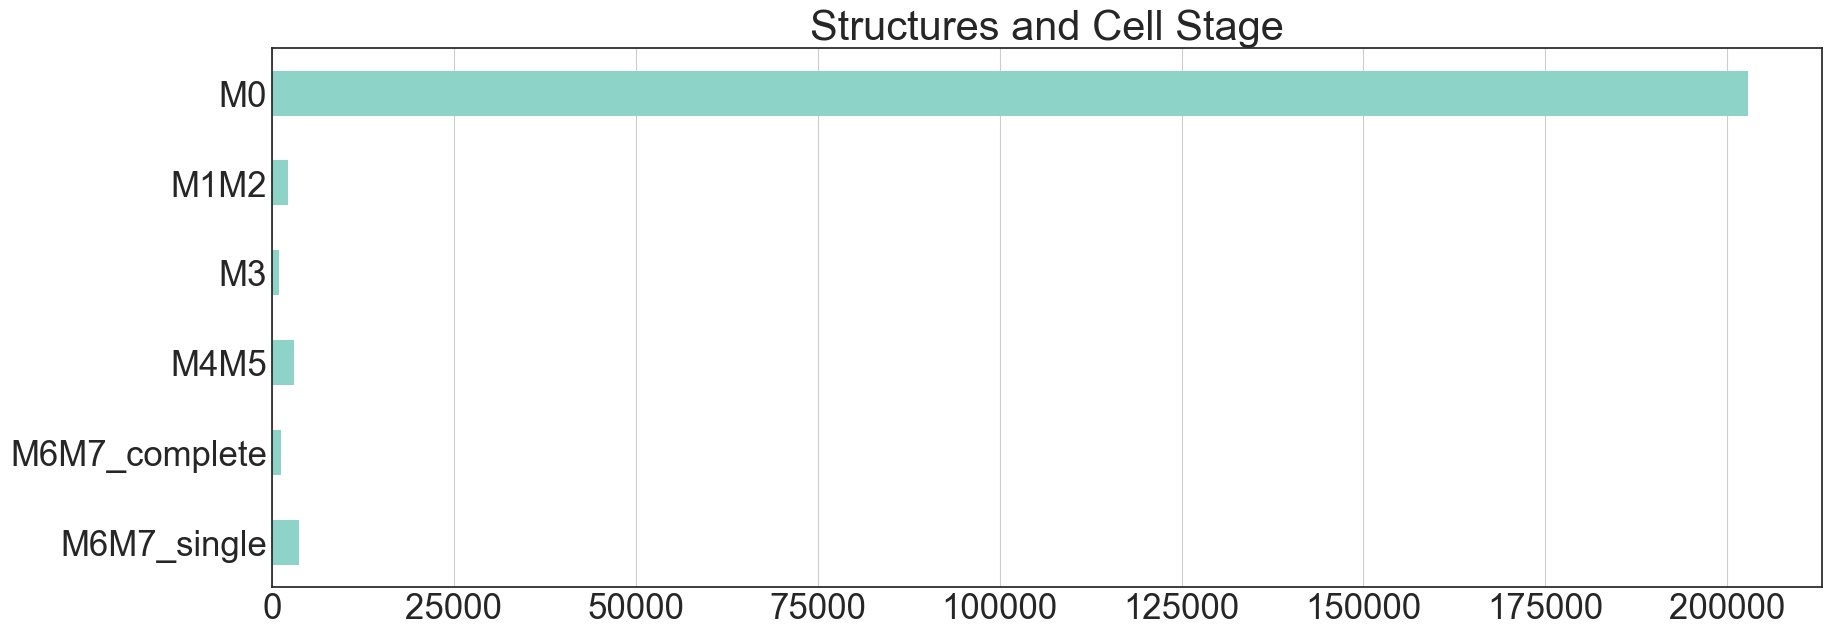

In [4]:
%matplotlib inline
plt.rcParams.update({'font.size': 25})
plt.style.use('seaborn-v0_8-white')   #print(plt.style.available)
# Code from Chapter 4 to make a bar plot
table = pd.pivot_table(df, index="cell_stage", aggfunc="size")
fig, axes = plt.subplots(figsize=(20, 7), dpi=100)
table.plot.barh(stacked=True, ax=axes)
axes.set_ylabel(None)
axes.set_title("Structures and Cell Stage")
axes.grid(True, which="major", axis="x")
axes.set_axisbelow(True)
axes.invert_yaxis()
plt.show()

In [5]:
#From Chapter 5
#loading library, making path for 
from serotiny.transforms.dataframe.transforms import split_dataframe
Path("serotiny_data").mkdir(parents=True, exist_ok=True)

# Sample n cells per group
n = 20 # number of cells per mitotic class
cells_to_include=[]
for name, group in df.groupby('cell_stage'):    
    sampled_group = group.sample(min([n,len(group)]), random_state=0)
    cells_to_include.append(sampled_group)
df_mitocells = pd.concat(cells_to_include).reset_index(drop=True)

#print(cells_to_include[0])

# Discarding all the M6M7_single cells
df_mitocells = df_mitocells.drop(df_mitocells[df_mitocells['cell_stage']=='M6M7_single'].index)

# Add the train, test and validate split
df_mitocells = split_dataframe(dataframe=df_mitocells, train_frac=0.7, val_frac=0.2, return_splits=False)

df_mitocells.to_csv("serotiny_data/mitocells.csv") 
print(f"Number of cells: {len(df_mitocells)}")
print(f"Number of columns: {len(df_mitocells.columns)}")

Number of cells: 100
Number of columns: 78


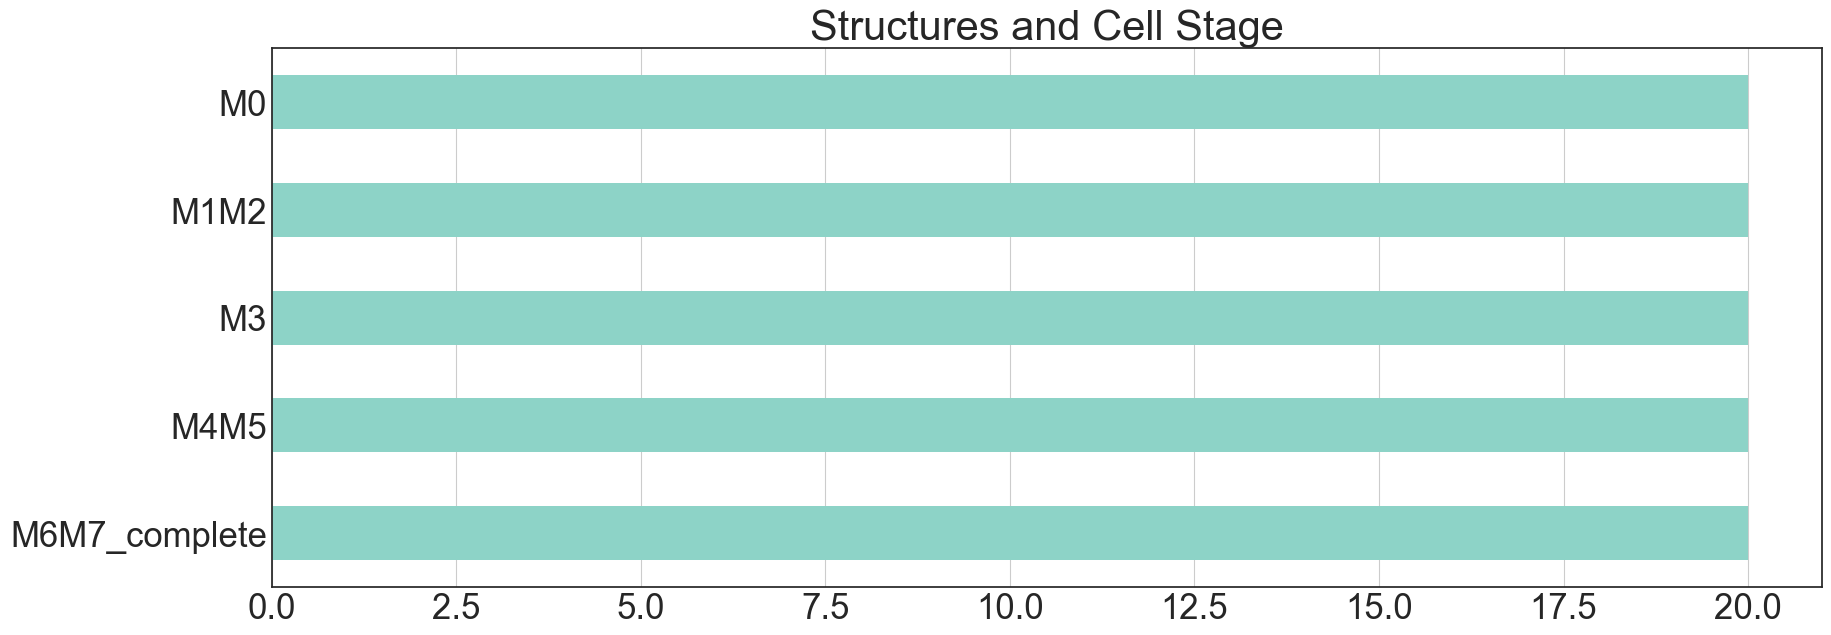

cell_stage
M0               20
M1M2             20
M3               20
M4M5             20
M6M7_complete    20
dtype: int64


In [6]:
# The bar plot again
%matplotlib inline
plt.style.use('seaborn-v0_8-white')   #print(plt.style.available)
# Code from Chapter 4 to make a bar plot
table = pd.pivot_table(df_mitocells, index="cell_stage", aggfunc="size")
fig, axes = plt.subplots(figsize=(20, 7), dpi=100)
table.plot.barh(stacked=True, ax=axes)
axes.set_ylabel(None)
axes.set_title("Structures and Cell Stage")
axes.grid(True, which="major", axis="x")
axes.set_axisbelow(True)
axes.invert_yaxis()
plt.show()
print(table)

In [7]:
from upath import UPath as Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbvv

from serotiny.io.image import image_loader
from cytodata_aics.io_utils import rescale_image

In [8]:
from datetime import datetime

# util to avoid referring to the same run unintentionally
now_str = lambda : datetime.now().strftime("%Y%m%d_%H%M%S")

In [9]:
print(np.unique(df["Structure"]))
some_cell=df[df.Structure=="microtubules"].sample(1).iloc[0]

['ER (SERCA2)' 'ER (Sec61 beta)' 'Golgi' 'actin bundles' 'actin filaments'
 'actomyosin bundles' 'adherens junctions' 'centrioles' 'cohesins'
 'desmosomes' 'endosomes' 'gap junctions' 'histones' 'lysosomes'
 'matrix adhesions' 'microtubules' 'mitochondria' 'nuclear envelope'
 'nuclear pores' 'nuclear speckles' 'nucleoli (DFC)' 'nucleoli (GC)'
 'peroxisomes' 'plasma membrane' 'tight junctions']


In [10]:
run_name = f"yf_bfdna_zproj_{now_str()}"
print(run_name)

# make sure data path in example_dataloader_2d.yml is updated to local

# cannot run locally due to memory issue

!serotiny train \
    model=example_classifier_2d \
    data=example_dataloader_2d \
    mlflow.experiment_name=cytodata_yf \
    mlflow.run_name={run_name} \
    trainer.gpus=[0] \
    trainer.max_epochs=2

yf_bfdna_zproj_20221019_184139


Error executing job with overrides: ['model=example_classifier_2d', 'data=example_dataloader_2d', 'mlflow.experiment_name=cytodata_yf', 'mlflow.run_name=yf_bfdna_zproj_20221019_184139', 'trainer.gpus=[0]', 'trainer.max_epochs=2']

Traceback (most recent call last):
  File "C:\Users\Youyi\.conda\envs\cytodata2\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Youyi\.conda\envs\cytodata2\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Youyi\.conda\envs\cytodata2\Scripts\serotiny.exe\__main__.py", line 7, in <module>
  File "C:\Users\Youyi\.conda\envs\cytodata2\lib\site-packages\serotiny\cli\cli.py", line 58, in main
    hydra.main(config_path=None, config_name=mode, version_base=None)(
  File "C:\Users\Youyi\.conda\envs\cytodata2\lib\site-packages\hydra\main.py", line 90, in decorated_main
    _run_hydra(
  File "C:\Users\Youyi\.conda\envs\cytodata2\lib\site-packages\hydra\_internal\utils.py",

In [11]:
from cytodata_aics.model_utils import save_predictions_classifier_multiclass